<center><img src="https://www.theladders.com/wp-content/uploads/dog-cat-190709-1000x563.jpg" width="900"></img></center>

# Import Libraries

In [1]:
from zipfile import ZipFile
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pickle as pk
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Extracting The Compressed Dataset

In [2]:
train='/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip'
test='/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip'
with ZipFile(train,'r') as zip:
    zip.extractall()
    print('The train dataset is extracted')
with ZipFile(test,'r') as zip:
    zip.extractall()
    print('The test dataset is extracted')

The train dataset is extracted
The test dataset is extracted


# Printing The Name Of Images

In [3]:
train_names=os.listdir('/kaggle/working/train')
pd.DataFrame(train_names,columns=['Train Names'])

Train Names
0      cat.10728.jpg
1       dog.2391.jpg
2       cat.8288.jpg
3       dog.5438.jpg
4       dog.4067.jpg
...              ...
24995   dog.5310.jpg
24996  dog.12433.jpg
24997   cat.5883.jpg
24998   dog.3296.jpg
24999   cat.1900.jpg

[25000 rows x 1 columns]

# Count Number Of Dog and Cat

In [4]:
dog_count=0
cat_count=0
for name in train_names:
    if name[0:3]=='dog':
        dog_count+=1
    else:
        cat_count+=1
print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


# Counting The Number Of Files 

In [5]:
train_file=next(os.walk('/kaggle/working/train'))
test_file=next(os.walk('/kaggle/working/test'))
print('Number of picture in train is :',len(train_file[-1]))
print('Number of picture in test is :',len(test_file[-1]))

Number of picture in train is : 25000
Number of picture in test is : 12500


# Size Of Images

In [6]:
path='/kaggle/working/train'
size=[]
for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
    size.append(img_array.shape)
pd.DataFrame(pd.Series(size).value_counts(),columns=['Number'])      

Number
(374, 500, 3)    2955
(375, 499, 3)    2912
(499, 375, 3)     261
(333, 499, 3)     229
(500, 374, 3)     227
...               ...
(150, 287, 3)       1
(349, 238, 3)       1
(319, 447, 3)       1
(320, 223, 3)       1
(414, 330, 3)       1

[8513 rows x 1 columns]

#  Resize Image

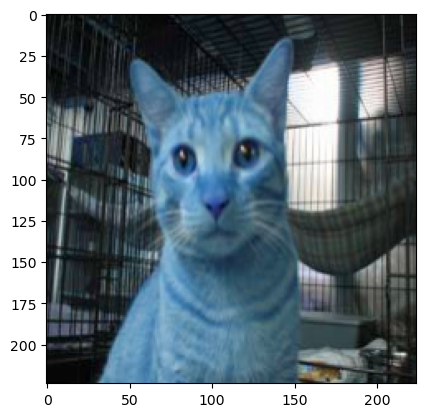

In [7]:
IMG_SIZE = 224
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE),cv2.IMREAD_COLOR)
plt.imshow(new_array)
plt.show()

# Show Picture In Train

In [8]:
def process_data(path,flage):
    data=[]
    for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            if (flage):
                data.append([new_array,img[0:3]])
            else:
                data.append(new_array)
    return data            

In [9]:
def show_images(data,flage):
    plt.figure(figsize=(15,15))
    ii=1
    for i,data in enumerate(data[:25]):
        label = data[1]
        img_data = data[0]
        if(flage):
            label="None"
        plt.subplot(5,5,ii)    
        plt.imshow(img_data)
        plt.axis('off')
        plt.title("Label: {}".format(label))
        ii+=1

In [10]:
path='/kaggle/working/train'
train=process_data(path,True)
train[0]

[array([[[177, 178, 174],
         [177, 178, 174],
         [177, 178, 174],
         ...,
         [178, 179, 177],
         [178, 179, 177],
         [177, 178, 176]],
 
        [[177, 178, 174],
         [177, 178, 174],
         [177, 178, 174],
         ...,
         [178, 179, 177],
         [178, 179, 177],
         [177, 178, 176]],
 
        [[177, 178, 174],
         [177, 178, 174],
         [177, 178, 174],
         ...,
         [177, 178, 176],
         [177, 178, 176],
         [177, 178, 176]],
 
        ...,
 
        [[ 34,  48,  46],
         [ 17,  31,  30],
         [ 18,  30,  34],
         ...,
         [ 37,  43,  50],
         [ 72,  78,  83],
         [116, 123, 121]],
 
        [[ 78,  94,  91],
         [ 34,  50,  49],
         [ 15,  29,  32],
         ...,
         [ 49,  55,  62],
         [ 87,  93,  97],
         [126, 132, 128]],
 
        [[122, 140, 133],
         [ 75,  92,  89],
         [ 42,  57,  59],
         ...,
         [ 56,  62,  69],
  

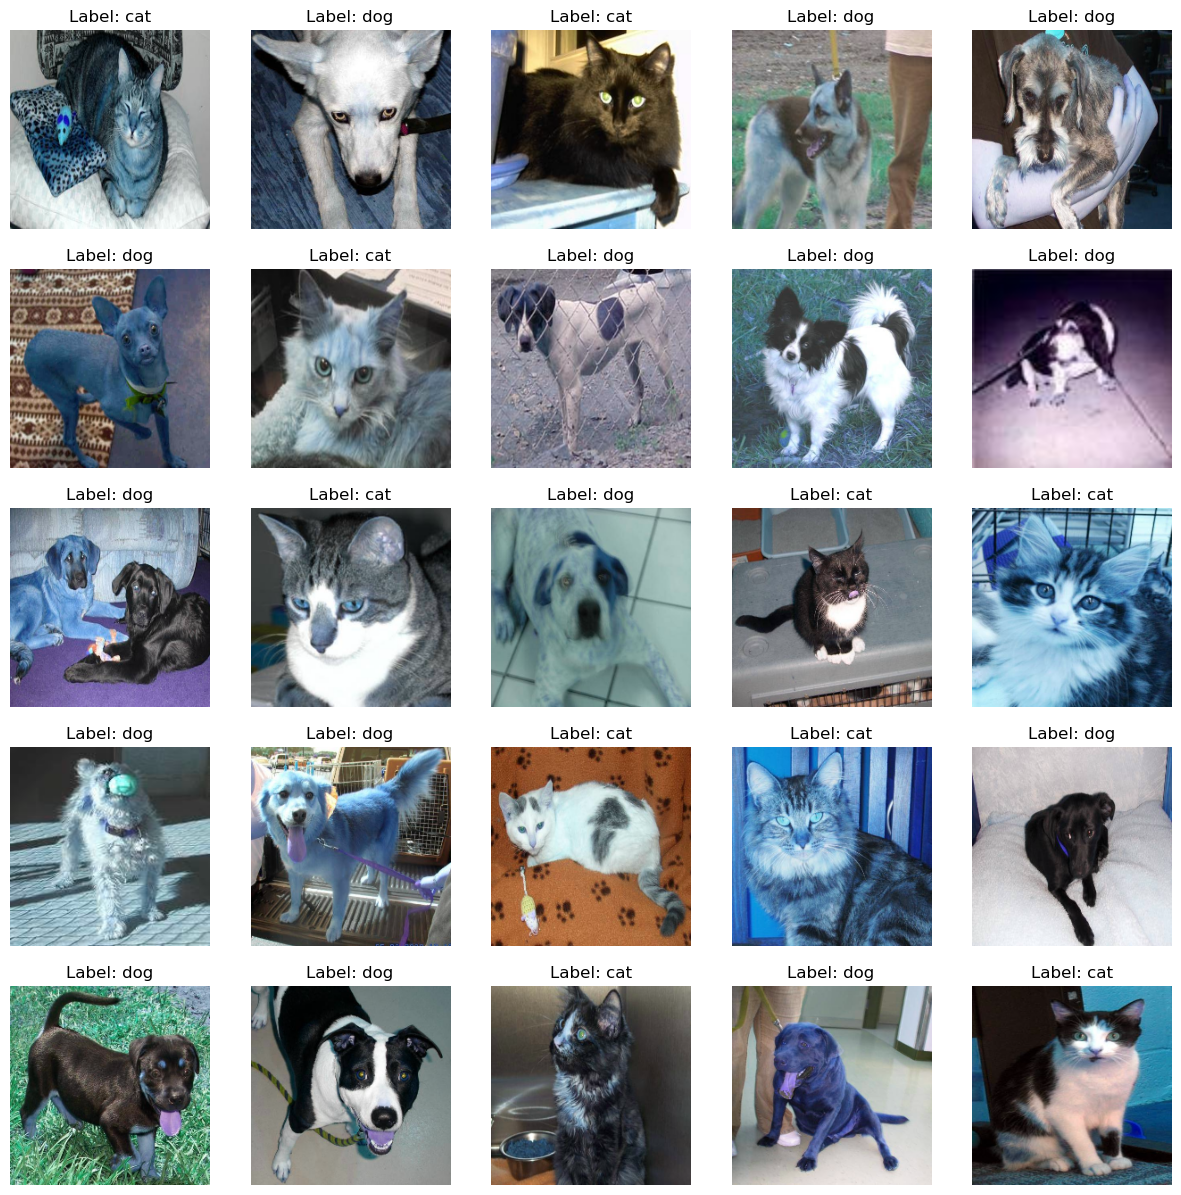

In [11]:
show_images(train,False)

# Show Picture In Test

In [12]:
path='/kaggle/working/test'
test=process_data(path,False)
test[0]

array([[[ 38,  44,  39],
        [ 32,  38,  33],
        [ 30,  36,  31],
        ...,
        [ 17,  27,  25],
        [ 10,  20,  18],
        [ 12,  20,  19]],

       [[ 45,  50,  45],
        [ 40,  45,  40],
        [ 38,  44,  39],
        ...,
        [ 11,  20,  17],
        [  7,  16,  14],
        [ 13,  21,  20]],

       [[ 46,  48,  44],
        [ 41,  44,  39],
        [ 39,  43,  38],
        ...,
        [ 12,  20,  17],
        [ 10,  17,  14],
        [ 12,  19,  18]],

       ...,

       [[ 42,  48,  53],
        [ 42,  48,  53],
        [ 38,  44,  49],
        ...,
        [ 85,  87,  88],
        [ 73,  75,  76],
        [ 67,  69,  70]],

       [[ 46,  52,  57],
        [ 47,  53,  58],
        [ 41,  47,  52],
        ...,
        [ 90,  92,  93],
        [ 72,  73,  75],
        [ 81,  83,  84]],

       [[ 41,  47,  52],
        [ 43,  49,  54],
        [ 38,  44,  49],
        ...,
        [ 98, 100, 101],
        [ 92,  94,  95],
        [ 91,  93,  94]]

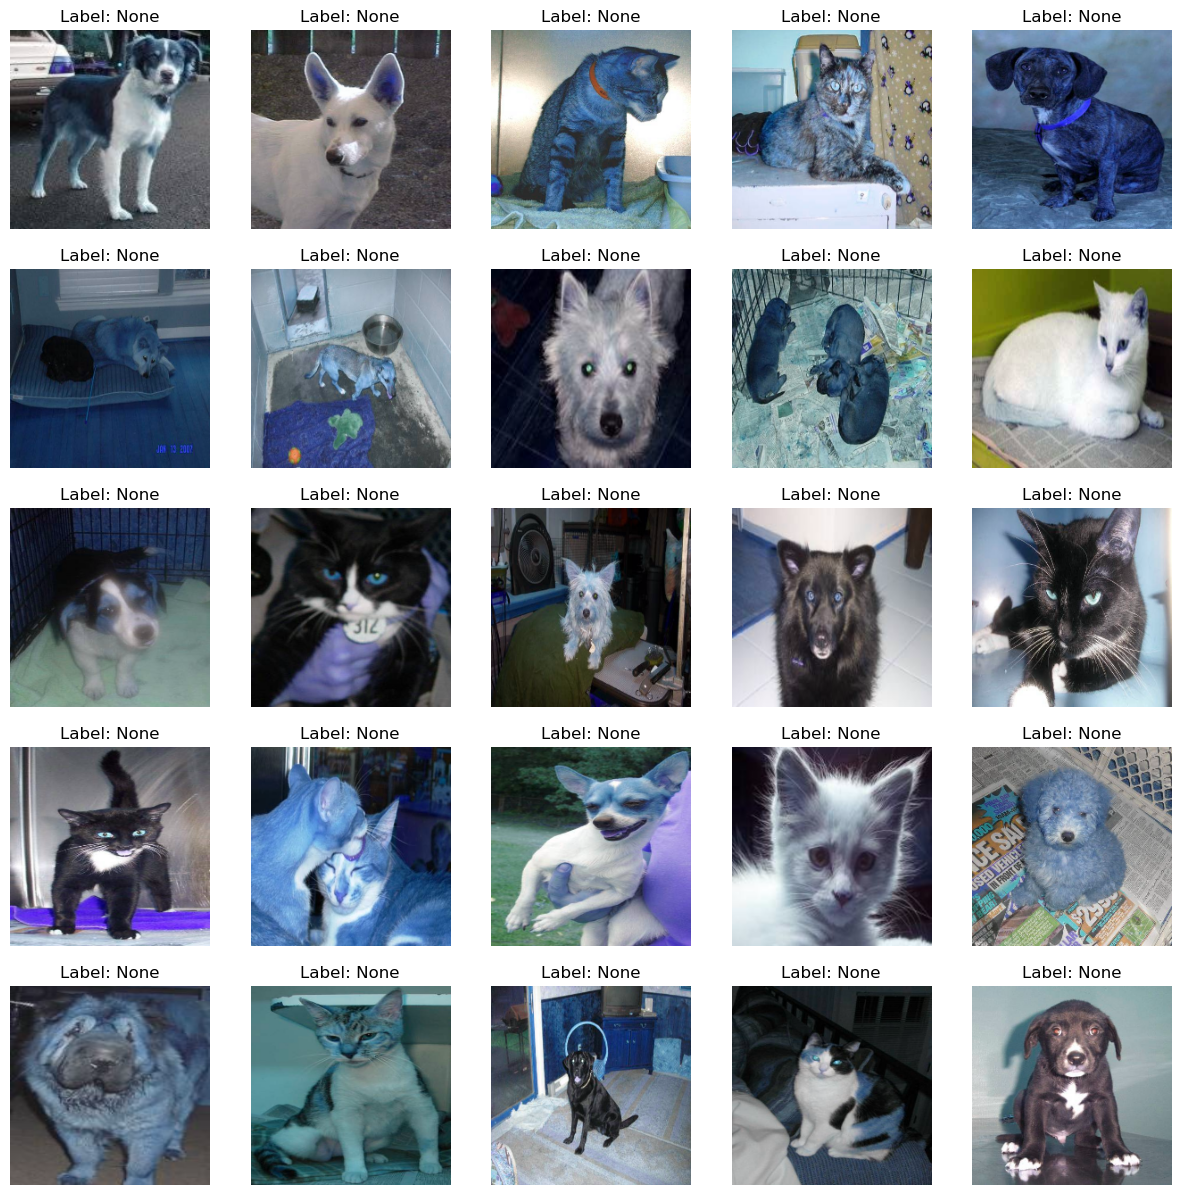

In [13]:
plt.figure(figsize=(15,15))
ii=1
for img in test:
    plt.subplot(5,5,ii)    
    plt.imshow(img)
    plt.axis('off')
    plt.title("Label: {}".format('None'))
    if ii==25:
        break
    ii+=1

# Splitting Data

In [14]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y = np.array([1 if i[1]=='dog' else 0 for i in train])

# Model Building

In [15]:
model =keras.models.Sequential()
model.add(keras.applications.ResNet50(include_top = False, pooling = 'max', weights = 'imagenet'))
model.add(keras.layers.Dense(2, activation = 'softmax'))
model.layers[0].trainable = False 

94765736/94765736 [==============================] - 1s 0us/step


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


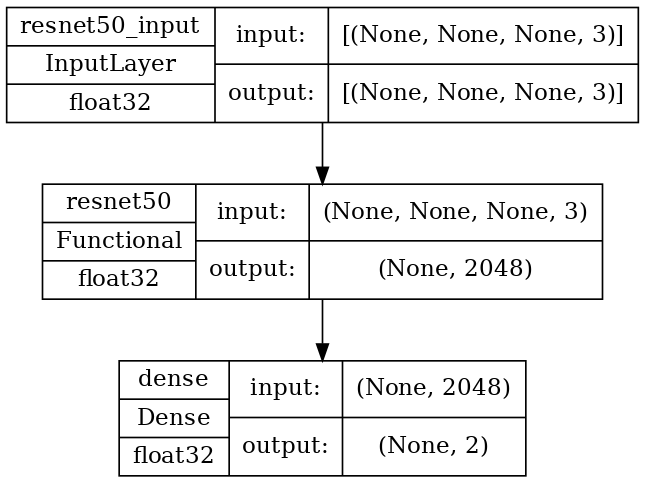

In [17]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [18]:
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

In [19]:
hist=model.fit(X, y, epochs=5,validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 2511s 4s/step - loss: 0.2450 - accuracy: 0.9672 - val_loss: 0.1063 - val_accuracy: 0.9828
Epoch 2/5
704/704 [==============================] - 2360s 3s/step - loss: 0.2007 - accuracy: 0.9795 - val_loss: 0.4325 - val_accuracy: 0.9580
Epoch 3/5
704/704 [==============================] - 2402s 3s/step - loss: 0.1788 - accuracy: 0.9825 - val_loss: 0.1075 - val_accuracy: 0.9824
Epoch 4/5
704/704 [==============================] - 2504s 4s/step - loss: 0.1189 - accuracy: 0.9862 - val_loss: 0.2908 - val_accuracy: 0.9772
Epoch 5/5
704/704 [==============================] - 2447s 3s/step - loss: 0.1429 - accuracy: 0.9856 - val_loss: 0.1391 - val_accuracy: 0.9868


In [20]:
hist_=pd.DataFrame(hist.history)
hist_

loss  accuracy  val_loss  val_accuracy
0  0.245042  0.967156  0.106325        0.9828
1  0.200655  0.979511  0.432542        0.9580
2  0.178801  0.982533  0.107503        0.9824
3  0.118899  0.986178  0.290790        0.9772
4  0.142928  0.985600  0.139077        0.9868

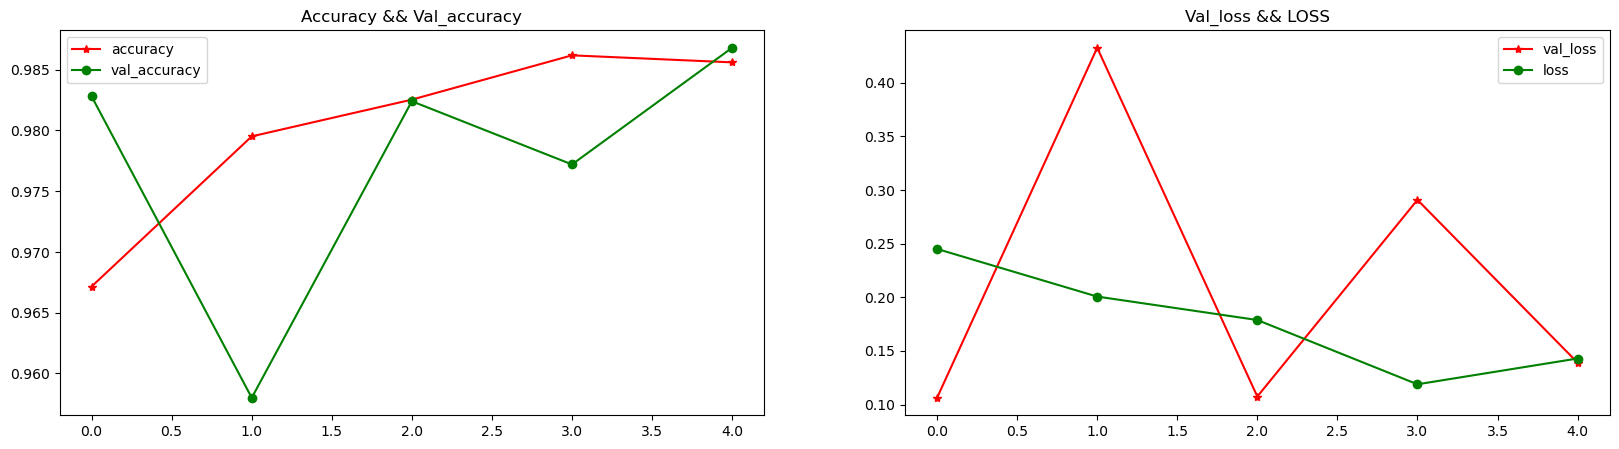

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(hist_['accuracy'],marker='*',c='r',label='accuracy')
plt.plot(hist_['val_accuracy'],marker='o',c='g',label='val_accuracy')
plt.title('Accuracy && Val_accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['val_loss'],marker='*',c='r',label='val_loss')
plt.plot(hist_['loss'],marker='o',c='g',label='loss')
plt.title('Val_loss && LOSS')
plt.legend()

# Save Model

In [22]:
model.save('/kaggle/working/cat_dog_model.model')

# Prediction

In [23]:
new_model = tf.keras.models.load_model('/kaggle/working/cat_dog_model.model')

In [24]:
test=np.array(test).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y_test=new_model.predict(test)

391/391 [==============================] - 1184s 3s/step


In [25]:
pred=[]
pred_name=[]
for row in y_test:
    N=np.argmax(row)
    pred.append(row[N])
    if N==0:
        pred_name.append('Cat')
    else:
        pred_name.append('Dog')
pd.DataFrame(pred)

0
0      1.000000
1      1.000000
2      0.999998
3      1.000000
4      1.000000
...         ...
12495  1.000000
12496  1.000000
12497  1.000000
12498  1.000000
12499  1.000000

[12500 rows x 1 columns]

In [26]:
pd.DataFrame(pred_name)

0
0      Dog
1      Dog
2      Cat
3      Cat
4      Dog
...    ...
12495  Cat
12496  Cat
12497  Dog
12498  Cat
12499  Cat

[12500 rows x 1 columns]

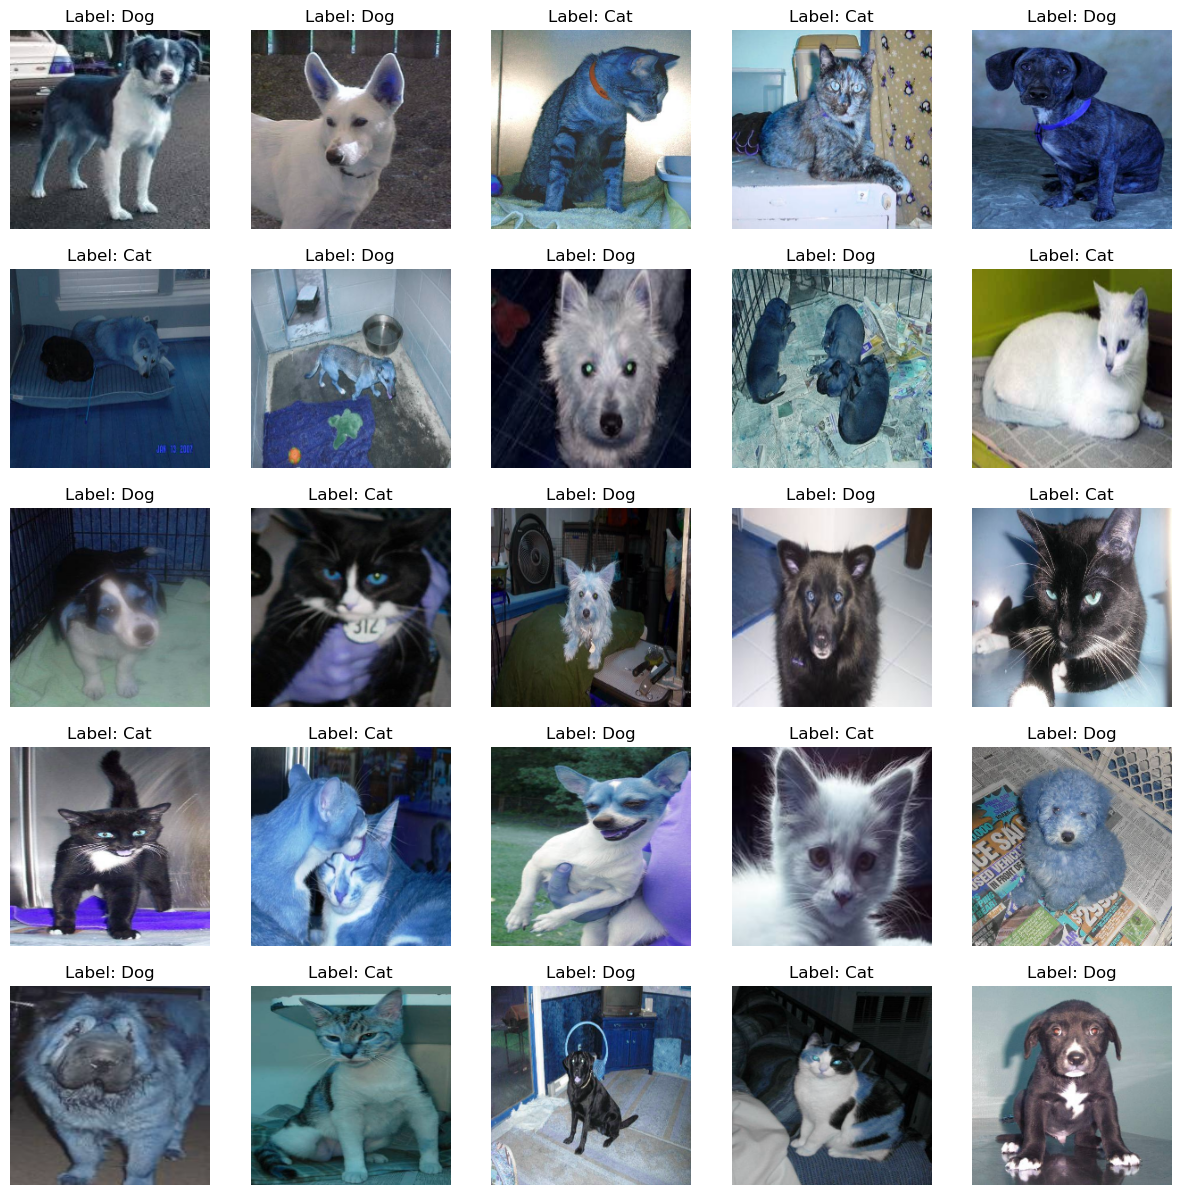

In [27]:
plt.figure(figsize=(15,15))
ii=1
for img in test:
    plt.subplot(5,5,ii)    
    plt.imshow(img)
    plt.axis('off')
    plt.title("Label: {}".format(pred_name[ii-1]))
    if ii==25:
        break
    ii+=1

In [28]:
id=list(range(1,len(pred)+1))
y_pred=pd.DataFrame(id,columns=['id'])
y_pred['label']=pred
y_pred.to_csv('/kaggle/working/p.csv')
y_pred=pd.read_csv('/kaggle/working/p.csv',index_col='id')
y_pred=y_pred.drop('Unnamed: 0',axis=1)
y_pred.to_csv('/kaggle/working/prediction.csv')
y_pred

label
id             
1      1.000000
2      1.000000
3      0.999998
4      1.000000
5      1.000000
...         ...
12496  1.000000
12497  1.000000
12498  1.000000
12499  1.000000
12500  1.000000

[12500 rows x 1 columns]

In [29]:
model.get_weights()

[array([[[[ 2.82526277e-02, -1.18737184e-02,  1.51488732e-03, ...,
           -1.07003953e-02, -5.27982824e-02, -1.36667420e-03],
          [ 5.86827798e-03,  5.04415408e-02,  3.46324709e-03, ...,
            1.01423981e-02,  1.39493728e-02,  1.67549420e-02],
          [-2.44090753e-03, -4.86173332e-02,  2.69966386e-03, ...,
           -3.44439060e-04,  3.48098315e-02,  6.28910400e-03]],
 
         [[ 1.81872323e-02, -7.20698107e-03,  4.80302610e-03, ...,
           -7.43396254e-03, -8.56800564e-03,  1.16849300e-02],
          [ 1.87554304e-02,  5.12730293e-02,  4.50406177e-03, ...,
            1.39413681e-02,  1.26296384e-02, -1.73004344e-02],
          [ 1.90453827e-02, -3.87909152e-02,  4.25842637e-03, ...,
            2.75742816e-04, -1.27962548e-02, -8.35626759e-03]],
 
         [[ 1.58849321e-02, -1.06073255e-02,  1.30999666e-02, ...,
           -2.26797583e-03, -3.98984266e-04,  3.39989027e-04],
          [ 3.61421369e-02,  5.02430499e-02,  1.22699486e-02, ...,
            1.199